<img src="signature-informal.png" alt="MDST Symbol" style="width: 500px;"/>

# Unsupervised Learning
This tutorial is about unsupervised learning and two most popular unsupervised learning methods: Kmeans clustering and hierarchical clustering.


## What is unsupervised learning?
* Goal: have data points gathering into several groups spontaneously
* Data scientists decide how to spontaneously gather the points
* Unsupervised learning is subjective with no "absolute" truth to refer to.

<img src="Unsupervised_Learning.png" alt="Unsupervised Learning" style="width: 600px;"/>

## K-means Clustering
1. Preassume that there are K groups(clusters).
2. Randomly preassume K locations in the variable space to be the centroids of the K different clusters.
3. Assign every data point to the closest of all the K centroids.
4. After assignment, recalculate all the K centroids based on the assignment result.
5. Repeat step 3 and 4 several times until the assignment of points doesn't change any more.

<img src="Kmeans.png" alt="Kmeans" style="width: 600px;"/>

Now let's see an example of applying Kmeans clustering on a simple dataset of two-dimensional points.

In [11]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.cluster import KMeans

Load the data.

In [9]:
with open('Kmeans_Example.pkl','rb') as f:
    points = pickle.load(f)

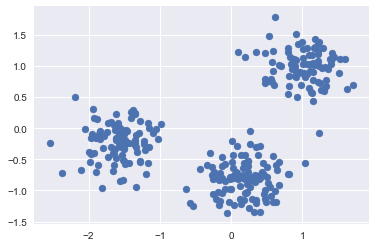

In [16]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs,ys)
plt.show()

Fit the model.

In [24]:
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(points)

Inspect the clustering result and the position of the centroids. The clustering is very successful at capturing the data pattern!

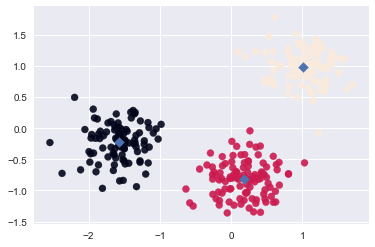

In [27]:
_ = plt.scatter(xs,ys,c=labels,alpha=0.9)
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
_ = plt.scatter(centroids_x,centroids_y,marker = 'D',s=50)
plt.show()

The above one is a toy example. There are a lot of concerns left with Kmeans. For example,
1. How many clusters should I assume?
2. How can I tell the goodness of my clustering?
Let's use an example from real life to answer the two questions above. The example is from [UCI Machine Learning Repo](https://archive.ics.uci.edu/ml/datasets/seeds)

First we read in the data. _Disclaimer: This data actually has a column of labels(type of crops for each seed). It cannot be the case in real world clustering tasks. This example is only for illustration purposes._ 

In [32]:
seeds = pd.read_csv('Grains/seeds.csv',header=None)

In [40]:
samples = seeds.drop(columns=[7])
varieties = seeds.iloc[:,7]

In [35]:
samples.head()

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


One of the evaluation methods that comes in handy is the sum of squares of distance between all the data points that their centroids. This value decreases as the number of clusters increases(why?). We want to pick a number of clusters so that the total sum of squares(or _inertia_) is small and doesn't improve much when this number continues to grow. 

In [36]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

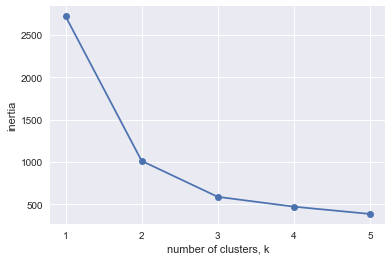

In [37]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

We can see that after k=3 the line becomes flat. Therefore we continue with the assumption of 3.

In [38]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

We can check how good our model "actually" is(caution again that this step is not supposed to happen in real-world clustering). The result is not bad!

In [41]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df['varieties'])
print(ct)

varieties   1   2   3
labels               
0           9   0  68
1           1  60   0
2          60  10   2


## Hierarchical Clustering
Now comes another kind of clustering called hierarchical clustering. This clustering features:
* Start with the points as individual clusters.
* At each step, merge the closest pair of clusters until only one cluster (or K clusters) left.

<img src="hierarchical_clustering.png" alt="Hierarchical Clustering" style="width: 600px;"/>

There is a problem though: how to define a distance between a cluster of points and another point(given that the distance between two single points has been defined)?

Typical options include:
* _Complete Linkage_: Distance between the outside point and the farthest point in the cluster.
* _Single Linkage_: Distance between the outside point and the closest point in the cluster.
* _Average Linkage_: Distance between the outside point and the centroid point in the cluster.

<img src="linkages.png" alt="linkages" style="width: 250px;"/>

Let's apply hierarchical clustering to the two data used in Kmeans clustering.

In [42]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [55]:
mergings = linkage(points,method='average')
# different linkages have completely different outcomes
# change the method parameter to "single" and "complete" to see changes in the dendrogram!

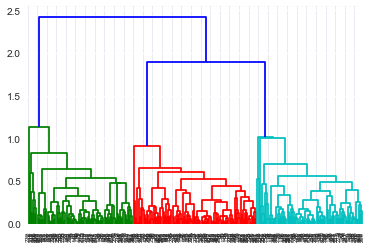

In [56]:
sns.set()
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

From the dendrogram above we see that the last three merges happen at a much higher place than other places, therefore we tend to have three clusters. To get the final labels, we run the following code below,

In [58]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings,3,criterion='distance')

Now let's try the other seed data.

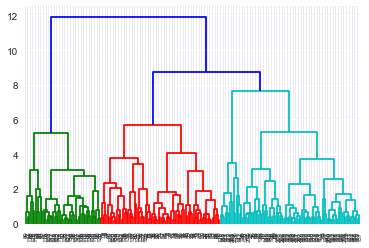

In [63]:
mergings = linkage(samples,method='complete')
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [64]:
# make the cut at height 8
labels = fcluster(mergings,8,criterion='distance')
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df['varieties'])
print(ct)

varieties   1   2   3
labels               
1           0  47   0
2          52  23   0
3          18   0  70


# Summary
1. Meaning of unsupervised learning
2. Procedure of Kmeans clustering
3. Measurement of Kmeans clustering and number of clusters to pick
4. Procedure of hierarchical clustering
5. Meaning of different linkages in hierarchical clustering
6. Understanding the dendrogram